In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Muralidhar\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
#finding the unique values in all the columns
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: YearsExperience - Unique Values: [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.7  3.9  4.   4.1  4.5  4.9
  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6 10.3 10.5]
Column: Salary - Unique Values: [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


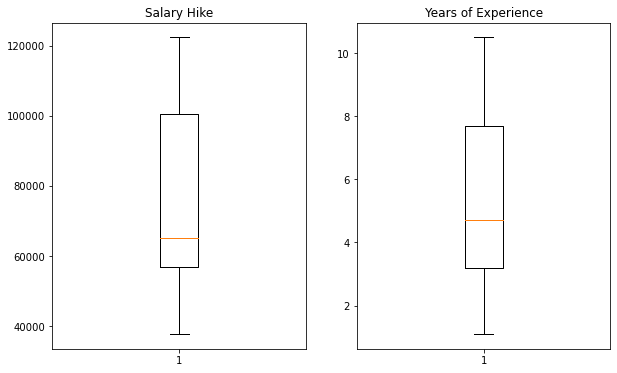

In [8]:
plt.subplots(figsize = (10,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()


In [9]:
#no outliers

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

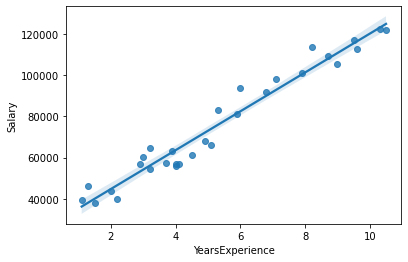

In [11]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])  

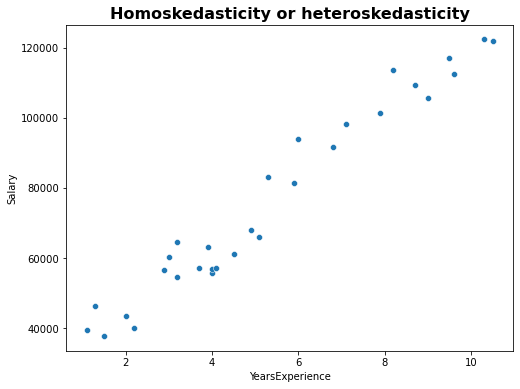

In [12]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Homoskedasticity or heteroskedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [13]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

C:\Users\Muralidhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


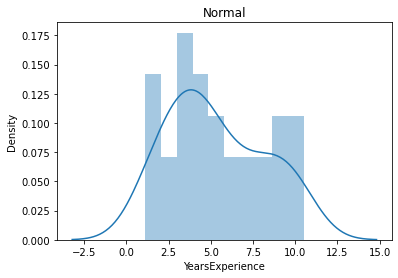

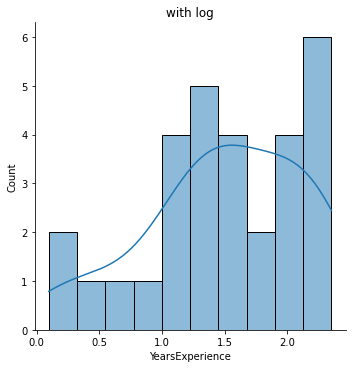

In [14]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Normal')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('with log')
plt.show()


C:\Users\Muralidhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Muralidhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


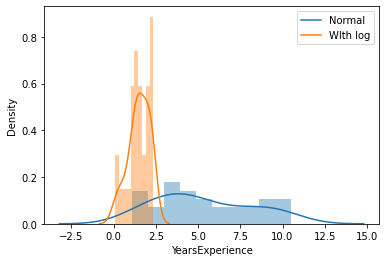

In [15]:
labels = ['Normal','WIth log']
sns.distplot(df['YearsExperience'], bins = 10)
sns.distplot(np.log(df['YearsExperience']), bins = 10)
plt.legend(labels)
plt.show()

In [16]:
import statsmodels.api as sm

C:\Users\Muralidhar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Muralidhar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Muralidhar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Square root applied')

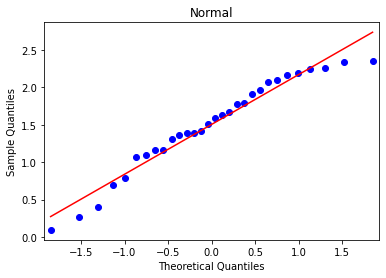

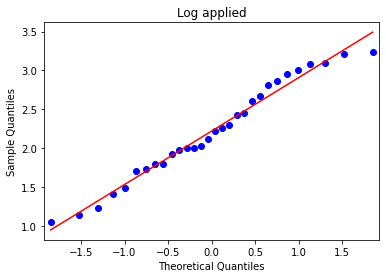

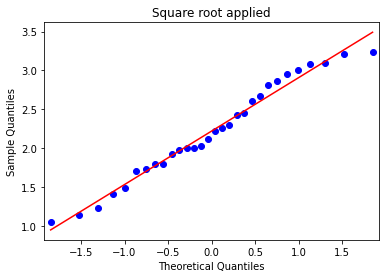

In [17]:
sm.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('Normal')
sm.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Log applied')
sm.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root applied')

In [18]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        11:46:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
x = df.filter(["YearsExperience"])
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [59]:
y= df.filter(["Salary"])
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [60]:
X = df['YearsExperience'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [61]:
Y = df['Salary'].values.reshape(-1,1)
Y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state =42)

In [25]:
predict_reg = LinearRegression()

In [26]:
predict_reg.fit(X_train, Y_train)

LinearRegression()

In [27]:
print(" Intercept value of Model is " ,predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)

 Intercept value of Model is  [25321.58301178]
Coefficient value of Model is  [[9423.81532303]]


In [28]:
Y_pred = predict_reg.predict(X_test)

In [29]:
nw1 = pd.DataFrame({'Actual':Y_test.flatten(), 'Predict': Y_pred.flatten()})
nw1

,Actual,Predict
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


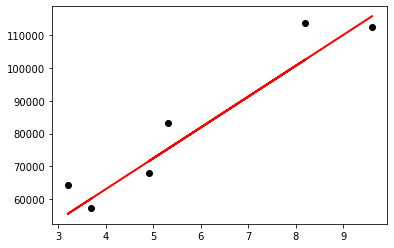

In [30]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()


In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R^2 Score :", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 6286.453830757749
Mean Squared Error: 49830096.85590839
Root Mean Squared Error: 7059.04362190151
R^2 Score : 0.9024461774180497


# log transformation 

In [32]:
X_log = np.log(df['YearsExperience'].values.reshape(-1,1))

In [33]:
y_log = df['Salary'].values.reshape(-1,1)

In [34]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [35]:
Y_pred_log= LinearRegression()

In [36]:
Y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [37]:
print(" Intercept value of Model is " ,Y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", Y_pred_log.coef_)

 Intercept value of Model is  [16808.04207062]
Co-efficient Value of Log Model is :  [[39297.91674992]]


In [38]:
linear_model= Y_pred_log.predict(X_test_1og)
linear_model

array([[105690.62002247],
       [ 79261.67485733],
       [ 99496.13089578],
       [ 82345.44586818],
       [ 62517.44576196],
       [ 68222.79629842]])

In [39]:
nw = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': linear_model.flatten()})
nw

,Actual,Predict
0,112635.0,105690.620022
1,67938.0,79261.674857
2,113812.0,99496.130896
3,83088.0,82345.445868
4,64445.0,62517.445762
5,57189.0,68222.796298


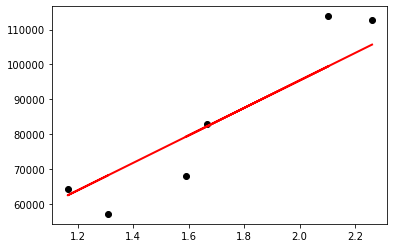

In [40]:
plt.scatter(X_test_1og, Y_test_log,  color='black')
plt.plot(X_test_1og, linear_model, color='red', linewidth=2)
plt.show()

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, linear_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, linear_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, linear_model)))
print("R^2 Score :", metrics.r2_score(Y_test_log, linear_model))

Mean Absolute Error: 7714.638101223964
Mean Squared Error: 84567607.74831854
Root Mean Squared Error: 9196.064796874723
R^2 Score : 0.8344395471211845


In [54]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           7.58e-19
Time:                        11:51:12   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# exponential transformation

In [42]:
X_e_log = df['YearsExperience'].values.reshape(-1,1)

In [43]:
Y_e_log = np.log(df['Salary'].values.reshape(-1,1))

In [44]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, Y_e_log, test_size=0.2, random_state= 42)

In [45]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [46]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [10.48525073]
 Exponent model Coefficient value is  [[0.12704681]]


In [47]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[11.70490014],
       [11.10778012],
       [11.5270346 ],
       [11.15859884],
       [10.89180053],
       [10.95532394]])

In [48]:
nw1 = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
nw1

,Actual,Predict
0,11.631908,11.704900
1,11.126351,11.107780
2,11.642303,11.527035
3,11.327656,11.158599
4,11.073567,10.891801
5,10.954117,10.955324


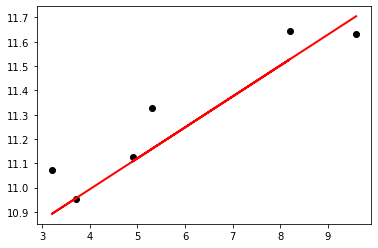

In [49]:
plt.scatter(X_test_exp, Y_test_exp,  color='black')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_exp, exp_model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_exp, exp_model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_exp, exp_model_pred))

Mean Absolute Error: 0.09314373254401727
Mean Squared Error: 0.013430075287585596
Root Mean Squared Error: 0.11588820167551828
R^2 Score :           0.8120949075482874


In [51]:
# as per the observed transformations expoenential model is the best fit model